In [19]:
from __future__ import absolute_import,division,print_function

In [20]:
import tensorflow as tf
import numpy as np
rng = np.random

In [21]:
# Parameters
learning_rate = 0.01
training_steps = 1000
display_step= 50

In [22]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [23]:
#Weight and Bias,initialized randomly
W = tf.Variable(rng.randn(),name='Weight')
b = tf.Variable(rng.randn(),name='bias')

# Linear regression(Wx+b)
def linear_regression(x):
    return W*x+b

#Mean square error
def mean_square(y_pred,y_ture):
    return tf.reduce_mean(tf.square(y_pred-y_ture))

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [24]:
# Optimization process
def run_optimization():
    #Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred,Y)
    # Compute gradients
    gradients = g.gradient(loss,[W,b])
    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients,[W,b]))

In [25]:
# Run training for the given number of steps
for step in range(1,training_steps+1):
    run_optimization()

    if step%display_step==0:
        pred = linear_regression(X)
        loss = mean_square(pred,Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))
        # print(f'step:{step}, loss:{loss:.f}, W:{W.numpy()}, b:{b.numpy()}')

step: 50, loss: 1.229819, W: 0.667472, b: -2.149295
step: 100, loss: 0.997652, W: 0.619885, b: -1.811927
step: 150, loss: 0.815581, W: 0.577744, b: -1.513166
step: 200, loss: 0.672797, W: 0.540425, b: -1.248593
step: 250, loss: 0.560822, W: 0.507377, b: -1.014298
step: 300, loss: 0.473009, W: 0.478111, b: -0.806814
step: 350, loss: 0.404143, W: 0.452194, b: -0.623074
step: 400, loss: 0.350138, W: 0.429243, b: -0.460360
step: 450, loss: 0.307785, W: 0.408918, b: -0.316267
step: 500, loss: 0.274571, W: 0.390919, b: -0.188663
step: 550, loss: 0.248524, W: 0.374980, b: -0.075662
step: 600, loss: 0.228097, W: 0.360865, b: 0.024408
step: 650, loss: 0.212078, W: 0.348365, b: 0.113027
step: 700, loss: 0.199516, W: 0.337296, b: 0.191504
step: 750, loss: 0.189664, W: 0.327493, b: 0.261000
step: 800, loss: 0.181938, W: 0.318812, b: 0.322544
step: 850, loss: 0.175879, W: 0.311125, b: 0.377045
step: 900, loss: 0.171127, W: 0.304317, b: 0.425309
step: 950, loss: 0.167401, W: 0.298288, b: 0.468050
st

In [26]:
import matplotlib.pyplot as plt

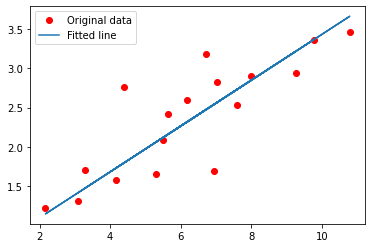

In [27]:
# Graphic display
plt.plot(X,Y,'ro',label='Original data')
plt.plot(X, np.array(W*X+b),label="Fitted line")
plt.legend()
plt.show()